<a href="https://colab.research.google.com/github/shivansh0901/classification-models-on-Iris-dataset/blob/main/ann_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import normalize 

In [5]:
dataset=pd.read_csv('Iris.csv')
print("Describing the data: ",dataset.describe())
print("Info of the data:",dataset.info())

Describing the data:                 Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidt

In [6]:
print("10 first samples of the dataset:",dataset.head(10))
print("10 last samples of the dataset:",dataset.tail(10))

10 first samples of the dataset:    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
5   6            5.4           3.9            1.7           0.4  Iris-setosa
6   7            4.6           3.4            1.4           0.3  Iris-setosa
7   8            5.0           3.4            1.5           0.2  Iris-setosa
8   9            4.4           2.9            1.4           0.2  Iris-setosa
9  10            4.9           3.1            1.5           0.1  Iris-setosa
10 last samples of the dataset:       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
140  141          

In [8]:
print(dataset["Species"].unique())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [9]:
dataset.loc[dataset["Species"]=="Iris-setosa","Species"]=0
dataset.loc[dataset["Species"]=="Iris-versicolor","Species"]=1
dataset.loc[dataset["Species"]=="Iris-virginica","Species"]=2
print(dataset.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm Species
0   1            5.1           3.5            1.4           0.2       0
1   2            4.9           3.0            1.4           0.2       0
2   3            4.7           3.2            1.3           0.2       0
3   4            4.6           3.1            1.5           0.2       0
4   5            5.0           3.6            1.4           0.2       0


In [10]:
dataset=dataset.iloc[np.random.permutation(len(dataset))]
print(dataset.head())

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm Species
142  143            5.8           2.7            5.1           1.9       2
31    32            5.4           3.4            1.5           0.4       0
87    88            6.3           2.3            4.4           1.3       1
98    99            5.1           2.5            3.0           1.1       1
97    98            6.2           2.9            4.3           1.3       1


In [12]:
X=dataset.iloc[:,1:5].values
y=dataset.iloc[:,5].values
X.shape,y.shape

((150, 4), (150,))

In [13]:
#normalisation
X_normalized=normalize(X,axis=0)
print("Examples of X_normalised\n",X_normalized[:3])

Examples of X_normalised
 [[0.08024771 0.07147336 0.10034783 0.10927845]
 [0.07471338 0.09000348 0.02951407 0.02300599]
 [0.08716562 0.06088471 0.0865746  0.07476947]]


In [15]:
total_length=len(dataset)
train_length=int(0.8*total_length)
test_length=int(0.2*total_length)

X_train=X_normalized[:train_length]
X_test=X_normalized[train_length:]
y_train=y[:train_length]
y_test=y[train_length:]

print("Length of train set x:",X_train.shape[0],"y:",y_train.shape[0])
print("Length of test set x:",X_test.shape[0],"y:",y_test.shape[0])

Length of train set x: 120 y: 120
Length of test set x: 30 y: 30


In [17]:
from keras.models import Sequential 
from keras.layers import Dense,Activation,Dropout 

from keras.utils import np_utils

In [18]:
y_train=np_utils.to_categorical(y_train,num_classes=3)
y_test=np_utils.to_categorical(y_test,num_classes=3)
print("Shape of y_train",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of y_train (120, 3)
Shape of y_test (30, 3)


In [20]:
model=Sequential()
model.add(Dense(1000,input_dim=4,activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [21]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=20,epochs=10,verbose=1)


Epoch 1/10
6/6 [==============================] - 3s 66ms/step - loss: 1.0901 - accuracy: 0.3000 - val_loss: 1.0717 - val_accuracy: 0.2333
Epoch 2/10
6/6 [==============================] - 0s 21ms/step - loss: 1.0506 - accuracy: 0.5000 - val_loss: 0.9905 - val_accuracy: 0.7667
Epoch 3/10
6/6 [==============================] - 0s 18ms/step - loss: 0.9592 - accuracy: 0.8917 - val_loss: 0.8581 - val_accuracy: 0.9667
Epoch 4/10
6/6 [==============================] - 0s 21ms/step - loss: 0.7952 - accuracy: 0.9417 - val_loss: 0.6340 - val_accuracy: 0.9667
Epoch 5/10
6/6 [==============================] - 0s 19ms/step - loss: 0.5955 - accuracy: 0.8833 - val_loss: 0.4250 - val_accuracy: 0.9667
Epoch 6/10
6/6 [==============================] - 0s 21ms/step - loss: 0.4268 - accuracy: 0.9250 - val_loss: 0.3397 - val_accuracy: 0.9333
Epoch 7/10
6/6 [==============================] - 0s 23ms/step - loss: 0.3255 - accuracy: 0.9333 - val_loss: 0.2796 - val_accuracy: 0.9333
Epoch 8/10
6/6 [===========

In [22]:
prediction=model.predict(X_test)
length=len(prediction)
y_label=np.argmax(y_test,axis=1)
predict_label=np.argmax(prediction,axis=1)

accuracy=np.sum(y_label==predict_label)/length * 100 
print("Accuracy of the dataset",accuracy )

1/1 [==============================] - 0s 211ms/step
Accuracy of the dataset 93.33333333333333


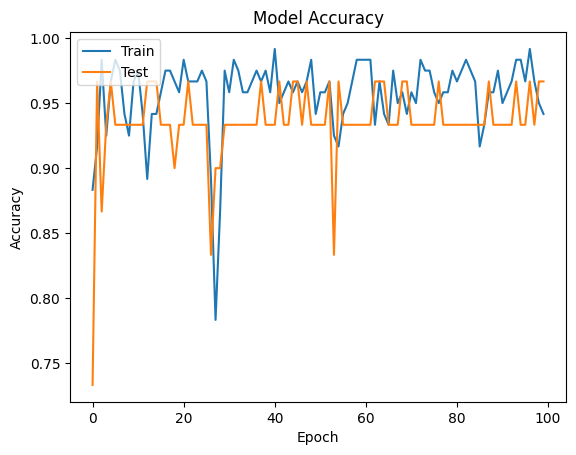

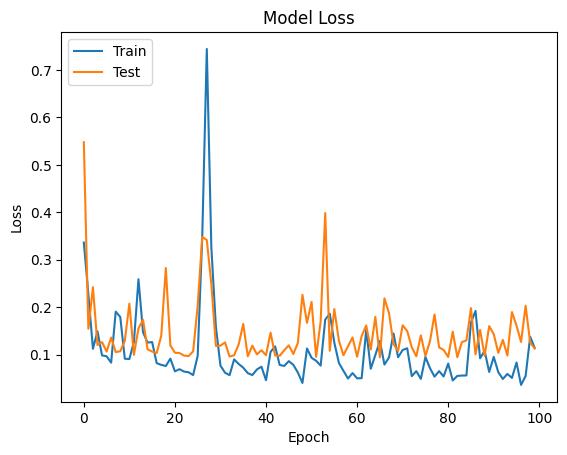

In [24]:
import matplotlib.pyplot as plt
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=8, verbose=0)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()